# Grishma Gosain Assignment 1
169057244 - Cp321 Section B

In [100]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [101]:
import pandas as pd
pd.__version__

'2.3.3'

# Part A

In [102]:
df=pd.read_csv(r"C:\Users\chill\Downloads\Canadian_Health_Survey_Sample.csv") # A.1

In [103]:
df.head() # A.2

,Province,Gender,Age,Income,BMI,PhysicalActivity,Smoking,SelfRatedHealth,StressLevel
0,Ontario,female,59,80572.0,25.7,3.8,yes,Good,6.0
1,New Brunswick,Male,38,125739.0,24.2,3.4,No,Good,9.0
2,Nova Scotia,M,31,55997.0,35.7,NaN,No,Excellent,NaN
3,Saskatchewan,Male,30,75947.0,28.3,3.9,No,Excellent,10.0
4,Saskatchewan,female,79,113966.0,31.2,1.6,No,Fair,6.0


In [104]:
df.info() #Part A.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          850 non-null    object 
 1   Gender            850 non-null    object 
 2   Age               850 non-null    int64  
 3   Income            816 non-null    float64
 4   BMI               808 non-null    float64
 5   PhysicalActivity  825 non-null    float64
 6   Smoking           850 non-null    object 
 7   SelfRatedHealth   850 non-null    object 
 8   StressLevel       825 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 59.9+ KB


In [105]:
df.describe(include='all') #Part A.2

,Province,Gender,Age,Income,BMI,PhysicalActivity,Smoking,SelfRatedHealth,StressLevel
count,850,850,850.000000,816.000000,808.000000,825.000000,850,850,825.000000
unique,10,6,NaN,NaN,NaN,NaN,6,5,NaN
top,Quebec,Male,NaN,NaN,NaN,NaN,No,Good,NaN
freq,100,230,NaN,NaN,NaN,NaN,552,258,NaN
mean,NaN,NaN,49.517647,77461.917892,27.488861,3.511394,NaN,NaN,5.294545
std,NaN,NaN,18.192604,22497.833440,5.064344,1.925825,NaN,NaN,2.121156
min,NaN,NaN,18.000000,5000.000000,13.500000,0.000000,NaN,NaN,1.000000
25%,NaN,NaN,33.000000,63438.000000,24.000000,2.100000,NaN,NaN,4.000000
50%,NaN,NaN,49.000000,78130.000000,27.300000,3.500000,NaN,NaN,5.000000
75%,NaN,NaN,66.000000,90529.500000,30.900000,4.700000,NaN,NaN,7.000000


**A.3) Identify one quantitative attribute and one qualitative attribute, and explain why.**

Qualitative 
I identity SelfRatedHealth as an ordered qualitative attribute because the factors are discrete and unique categories with an meaningful order. The factors being: Poor, Fair, Good, Very Good, Excellent, and are ordered least to greatest for health.

Quantative
I identify Age as an discrete quantitative attribute because the factors are numerical and in discrete whole number units, for example, 59 is discrete numeric factor. 

# Part B

In [106]:
df["Gender"] = df["Gender"].replace(['F','f','female'],'Female') # B.1

In [107]:
df["Gender"] = df["Gender"].replace(['M', 'm', 'male'],'Male') # B.1

In [108]:
df["Smoking"] = df["Smoking"].replace(['Y', 'yes', 'YES','y'],'Yes') # B.1

In [109]:
df["Smoking"] = df["Smoking"].replace(['N', 'no', 'NO','n'],'No') # B.1

In [110]:
df = df.dropna(subset=['BMI','Income','StressLevel','PhysicalActivity']) # B.2

B.2) I used df.dropna to drop the missing values such as an NaN present in BMI. The dropna function automatically drops empty, missing or NaN values and removes the rows as it’s considered invalid. I used it on BMI, Income, StressLevel, PhysicalActivity as all are important categories for the dataset and thus having an type of invalid or incomplete data can cause issues when analyzing, visualising with graphs and summarising statistics. 

In [111]:
df['Age']= df['Age'].astype(int) # B.3

In [112]:
df['StressLevel']= df['StressLevel'].astype(int)  # B.3

In [113]:
df['Income']= df['Income'].astype(float)  # B.3

In [114]:
df['BMI']= df['BMI'].astype(float)  # B.3

**BMI Category**

- Above 30 -> Obese
- Under 30 -> Overweight
- Under 25 -> Normal
- Under 18.5 -> Underweight

In [115]:
df["BMI_Category"] = "Obese" #Creating column w/stand-in val

In [116]:
df.loc[df["BMI"] < 30, "BMI_Category"] = "Overweight"
df.loc[df["BMI"] < 25, "BMI_Category"] = "Normal"
df.loc[df["BMI"] < 18.5, "BMI_Category"] = "Underweight"

**Income Category**

- Under 50k -> Poor
- 50k - 80k -> Middle Class
- 80k - 110k -> Upper Class
- Over 110k -> Wealthy

In [117]:
df["IncomeBracket"] = ">110k" #Creating column w/stand-in val

In [118]:
df.loc[df["Income"] < 110000 , "IncomeBracket"] = "80-110k"
df.loc[df["Income"] < 80000, "IncomeBracket"] = "50-80k"
df.loc[df["Income"] < 50000, "IncomeBracket"] = "<50k"

In [119]:
df.head(15)

,Province,Gender,Age,Income,BMI,PhysicalActivity,Smoking,SelfRatedHealth,StressLevel,BMI_Category,IncomeBracket
0,Ontario,Female,59,80572.0,25.7,3.8,Yes,Good,6,Overweight,80-110k
1,New Brunswick,Male,38,125739.0,24.2,3.4,No,Good,9,Normal,>110k
3,Saskatchewan,Male,30,75947.0,28.3,3.9,No,Excellent,10,Overweight,50-80k
4,Saskatchewan,Female,79,113966.0,31.2,1.6,No,Fair,6,Obese,>110k
5,Newfoundland and Labrador,Female,24,101828.0,27.8,4.5,Yes,Good,5,Overweight,80-110k
6,Ontario,Female,68,64076.0,24.3,0.9,Yes,Very Good,3,Normal,50-80k
7,Nova Scotia,Female,72,82479.0,27.3,3.6,No,Very Good,8,Overweight,80-110k
8,British Columbia,Female,19,78040.0,34.4,2.9,Yes,Good,4,Obese,50-80k
9,Ontario,Male,55,83639.0,30.0,4.1,No,Very Good,4,Obese,80-110k
10,Manitoba,Male,54,64026.0,18.6,3.7,No,Fair,8,Normal,50-80k


In [120]:
df.to_csv("Canadian_Health_Survey_Cleaned.csv", index=False)

# Part C: Visualization

In [121]:
import matplotlib.pyplot as plt

**C.1: Bar Chart**

In [122]:
Health_Bar = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}
df["SelfRatedHealth_num"] = df["SelfRatedHealth"].replace(Health_Bar)
#Converting SelfRatedHealth txt values into numerics

C:\Users\chill\AppData\Local\Temp\ipykernel_22592\658918477.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["SelfRatedHealth_num"] = df["SelfRatedHealth"].replace(Health_Bar)


In [123]:
avg_health = df.groupby("Province")["SelfRatedHealth_num"].mean()
avg_health_sorted = avg_health.sort_values(ascending=False)

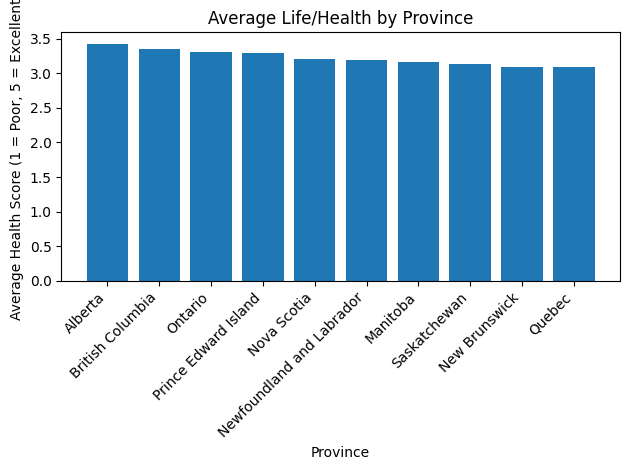

In [136]:
fig, ax = plt.subplots()

ax.bar(avg_health_sorted.index, avg_health_sorted.values)

ax.set_title("Average Life/Health by Province")
ax.set_xlabel("Province")
ax.set_ylabel("Average Health Score (1 = Poor, 5 = Excellent)")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**C.2: Scatter Plot**

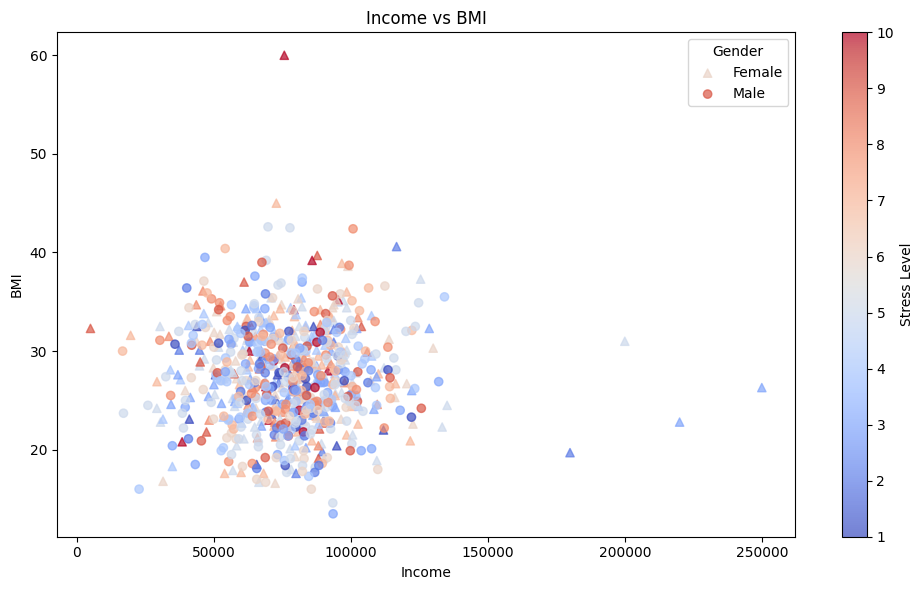

In [137]:
fig, ax = plt.subplots(figsize=(10, 6))

markers = {
    "Male": "o",
    "Female": "^"
}

# Gender Plot
for gender in df["Gender"].unique():
    subset = df[df["Gender"] == gender]
    
    scatter = ax.scatter(
        subset["Income"],
        subset["BMI"],
        c=subset["StressLevel"],
        cmap="coolwarm",
        marker=markers[gender],
        alpha=0.7,
        label=gender
    )

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Stress Level")

# Labels & title
ax.set_title("Income vs BMI")
ax.set_xlabel("Income")
ax.set_ylabel("BMI")

#Legend
ax.legend(title="Gender")

plt.tight_layout()
plt.show()



**C.3: Diverging Visualization**

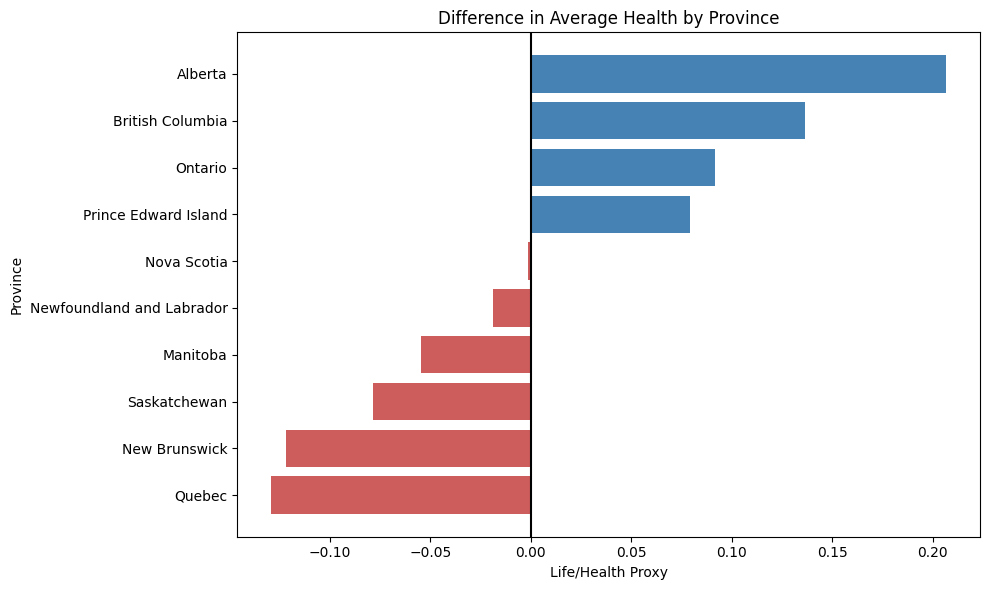

In [138]:
overall_mean = df["SelfRatedHealth_num"].mean()
province_mean = df.groupby("Province")["SelfRatedHealth_num"].mean()
delta_life_proxy = province_mean - overall_mean

# Organizing by values
delta_sorted = delta_life_proxy.sort_values()

# Colors - blue & red
colors = ["indianred" if value < 0 else "steelblue" 
          for value in delta_sorted]

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(delta_sorted.index, delta_sorted.values, color=colors)
ax.axvline(0, color="black")

# The Labels
ax.set_title("Difference in Average Health by Province")
ax.set_xlabel("Life/Health Proxy")
ax.set_ylabel("Province")

plt.tight_layout()
plt.show()

**C.4) Briefly explain design choices using principles (color scales, cognitive load, continuity).**

* Bar Graph:
The graph applies Cognitive Load Theory by avoiding the use of different colors for every province which is unnecessary, and rather using one consistent color, which reduces visual clutter.
Additionally, using clear axis labels and direct province labelling, referring the Signalling Principle, it’s easier to reference the label directly attached to each column rater than looking at, for example, a color legend. 

* Scatter Plot: 
This plot utilized a Coolwarm color scheme to represent stress level, as it provides a sequential color scaling (blue to red) to represent low stress to high stress. The fact that the general public perceive red = higher stress makes it easier to comprehend the meaning of the color scale. 
Different shaped color marker for Female and Male datapoints were used again to make it visually easier to differentiate markets in the graph while also reducing cognitive load by avoiding relying on a color scale alone.

* Divergence Bar Graph: 
This graph used red and blue to visually differentiate between negative Life/Health proxy versus positive. Again, as its in our nature to perceive red as an indicator of something on the poor side of an scale, thus making it easier for viewers to get a grasp of what the graph is portraying about poor health proxies. 
The bar’s x-axis being centered at zero is to emphasise the differences from the overall average, and displaying visual continuity for a clearer narrative of our data. Additionally, I sorted the values from least to greatest so it’s easier on the viewer’s eyes and simpler to analyze.


# Part D: Interpretation 

**D.1) Discuss observed relationships (e.g. association between Income and BMI; differences by Province/Gender).**

* Average Life/Health by Province:
Best: Alberta, Worst: New Brunswick
I would say there isn’t too clear of a correlation between province and average life/health by province as all of the provinces had around 3.2 - 3.5 with slight differences of just tenths of a decimal. Therefore, I can say the average health in correlation with province is consistent across all of Canada’s provinces with no notable deviations.

* Income vs. BMI:
Again, the scatter plot doesn’t display a strong relationship between income and BMI, as the BMI values are scattered across without any correlation to income.  A notable point is that most datapoints cluster at the $50,000 - $100,000 income range, meaning the vast majority of respondents were in that range. There were very few data points for income ranges beyond that. Higher stress levels appeared more frequently with those with lower income, meaning there’s a correlation between Stress and Income, rather than BMi and Income.

* Life/Health Proxy and Difference in Average Health by Province:
The graph displays which provinces are below or above the overall average self-rated health score. The provinces being under were: Saskatchewan, Quebec, Nova Scotia, New Brunswick and Manitoba. However, as displayed in the first bar graph, the difference is minuscule and only in the tenths of a decimal. However, by analyzing the lower scoring provinces you can attempt to determine factors that can be in correlation, such as these 5 provinces have an older population, more rural areas with limited healthcare in close proximities, and more. 



**D.2) Identify one potential confound or limitation due to data quality (missingness, outliers, category ambiguity).**

The scatter plot has over 75% of correspondence in the $50,000 - $100,000 income range, with relatively few data points in the higher/lower income categories. This makes it difficult to find any correlation between income vs. BMI as there’s simply not enough data evidence in the full income range to support any trends.

Additionally, numerous factors in the dataset are based on subjective self-reporting.
Such as self-rated health measure which is solely based on respondents perceptive of their own health, rather than objective medical assessments which can introduce inaccuracy and bias. Similarly, stress level is subjective and differentiates amongst each individual, and unless participants are provided with standardized criteria to evaluate their stress levels, then again it’s another highly subjective matter which can shrewd the dataset and give disruptive outliers. 
